**Programmer:** python_scripts (Abhijith Warrier)

**PYTHON SCRIPT TO **_CLUSTER CUSTOMERS USING KMeans (WITH SCALING & VISUALIZATION)_**. 🐍🛍️📊**

This script shows how to **segment customers** with **K-Means clustering**. We’ll create a small “mall customers”-style dataset (e.g., **Annual Income** vs **Spending Score**), scale features, fit **KMeans (k=3)**, attach cluster labels, and visualize clusters with centroids.

### 📦 Imports

We’ll use pandas for data, scikit-learn for scaling + KMeans, and matplotlib for plotting.

In [1]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import preprocessing and model
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### 🧮 Create a Tiny “Customers” Dataset

We’ll simulate a small dataset with Annual Income (k$) and Spending Score (1–100) to keep things simple and visual.

In [2]:
# Create a small demo dataset (replace with your real data)
data = {
    "CustomerID": range(1, 21),
    "AnnualIncome_k$": [15, 16, 17, 18, 20, 22, 25, 28, 30, 33, 60, 62, 65, 68, 70, 72, 75, 78, 80, 85],
    "SpendingScore":   [18, 20, 22, 25, 28, 30, 35, 40, 42, 45, 55, 58, 60, 62, 65, 66, 68, 70, 72, 75],
}
df = pd.DataFrame(data)

# Peek at the data
df.head()

,CustomerID,AnnualIncome_k$,SpendingScore
0,1,15,18
1,2,16,20
2,3,17,22
3,4,18,25
4,5,20,28


### 🧰 Select Features & Standardize

Clustering uses distance, so scaling features to similar ranges is important.

In [3]:
# Choose features for clustering
features = ["AnnualIncome_k$", "SpendingScore"]
X = df[features].values

# Standardize features (mean=0, std=1) to make distances comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 🤖 Fit K-Means (k=3) & Assign Cluster Labels

We’ll start with k=3 clusters (you can tune k later via the elbow method).

In [4]:
# Initialize KMeans: set k=3, use a fixed random_state for reproducibility
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

# Fit on scaled data and predict cluster labels
labels = kmeans.fit_predict(X_scaled)

# Attach labels back to the original DataFrame
df["Cluster"] = labels

# Quick look at cluster counts
df["Cluster"].value_counts().sort_index()

Cluster
0     4
1    10
2     6
Name: count, dtype: int64

### 📍 Inspect Cluster Centroids (Back in Original Units)

Cluster centers are in scaled space; let’s invert them to original units for interpretation.

In [5]:
# Inverse-transform centroids to original feature scale
centroids_scaled = kmeans.cluster_centers_              # (k, n_features) in scaled space
centroids_orig = scaler.inverse_transform(centroids_scaled)

# Put into a neat DataFrame
centers_df = pd.DataFrame(centroids_orig, columns=features)
centers_df.index.name = "Cluster"
centers_df

,AnnualIncome_k$,SpendingScore
Cluster,,
0,29.0,40.500000
1,71.5,65.100000
2,18.0,23.833333


### 📈 Visualize Clusters & Centroids (2D Scatter)

Plot Annual Income vs Spending Score, color by cluster, and mark centroids.

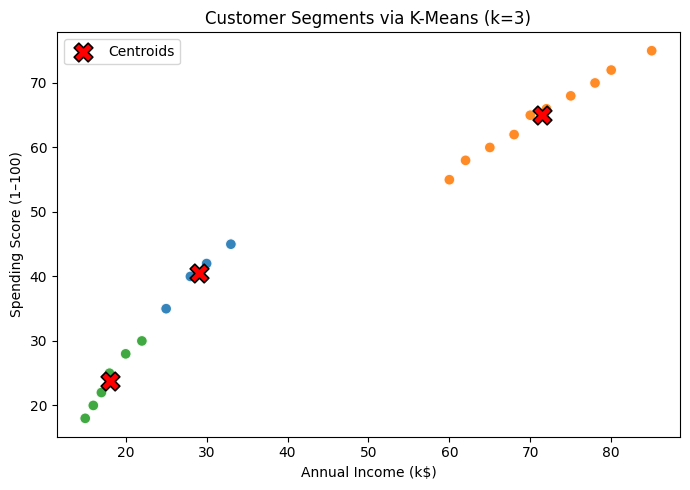

In [6]:
# Create a color map for up to 3 clusters
colors = np.array(["#1f77b4", "#ff7f0e", "#2ca02c"])  # blue, orange, green

plt.figure(figsize=(7, 5))

# Scatter plot of customers colored by cluster
plt.scatter(
    df["AnnualIncome_k$"], df["SpendingScore"],
    c=colors[df["Cluster"].values], s=60, edgecolor="white", linewidth=0.8, alpha=0.9
)

# Plot centroids (bigger, with black edge)
plt.scatter(
    centers_df["AnnualIncome_k$"], centers_df["SpendingScore"],
    c="red", s=180, marker="X", edgecolor="black", linewidth=1.2, label="Centroids"
)

plt.title("Customer Segments via K-Means (k=3)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend()
plt.tight_layout()
plt.show()

### 📝 Notes & Tips
- Why scale? K-Means minimizes Euclidean distance; unscaled features can dominate the distance.
- Choosing k: Use the Elbow method (plot inertia vs k) or Silhouette score to pick a good k.
- Initialization: n_init=10 runs K-Means with 10 different initial seeds and picks the best (safer results).
- Real datasets: Replace the synthetic df with your actual customer table; just set features accordingly.